## NATURAL SPLINE METHOD

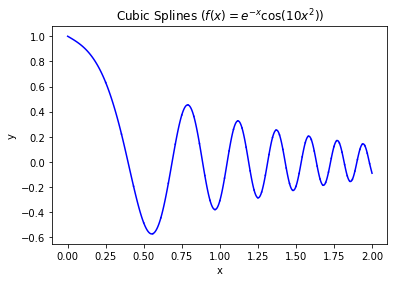

0.19900037937719306


In [2]:
import numpy as np
import matplotlib.pyplot as plt 

np.set_printoptions(suppress=True)

##Matrix in form AB = C  


##define function to calculate the value of y
def fn(x):
    return np.exp(-x) * np.cos(10*x**2) #np.sin(x) 

###INitializations

#Create vector x
x = np.sqrt(np.arange(0, 64.001)/16)#64.001 #np.sqrt(np.arange(0,32.001)/8) ##NOTE SMALL x HERE
#x = np.array([0,1,3])  testing array

## define N as the length of x
N = len(x)

#define n as the number of Cubic splines
#There are n splines, each having 3 unknowns:total 3n unknowns
#Therefore, we need 3n equations in order to solve for
n = N-1 ##n = 32

#Create Matrix A
A = np.zeros((4*n, 4*n))*1.0

#Create vector C
C = np.zeros(4*n)*1.0


#
for i in range(n):
    A[i,i] = x[i]**3
    A[i,n+i] = x[i]**2
    A[i,2*n+i] = x[i]
    A[i,3*n+i] = 1
    
    #Rows n to 2n-1
    A[n+i, i] = x[i+1]**3
    A[n+i, n+i] = x[i+1]**2
    A[n+i, 2*n+i] = x[i+1]
    A[n+i, 3*n+i] = 1

    
    C[i] = fn(x[i])
    C[n+i] = fn(x[i+1])


    ###Rows 2n: 3n-1
for j in range(n-1):
    row = 2*n+j
    columns = [j, j+1, n+j, n+j+1, 2*n+j, 2*n+j+1]
    ###start at j+1 since derivatives are equal at the interior points
    values = 3*x[j+1]**2, -3*x[j+1]**2, 2*x[j+1], -2*x[j+1], 1, -1
    A[row, [columns]] = values
   
    ###Function values for Rows C [2n: 3n-1] is zero since we equate derivatives and take everything to the LKS


    ###Rows 3n-1: 4n-2
for q in range(n-1):
    row = 3*n-1 + q
    columns = [q, q+1, n+q, n+q+1]
    ###start at j+1 since derivatives are equal at the interior points
    values = 6*x[q+1], -6*x[q+1], 2, -2
    A[row, [columns]] = values
        ###Function values for Rows C [3n-1:4n-2] is zero since we equate derivatives and take everything to the LKS
    
    

###Use natural spline. Set 2nd derivative at endpoints(x0, xn) to zero to get 2 additional eqns...
A[4*n-2, [0,n]] = 6*x[0], 2
A[4*n-1, [n-1,2*n-1]] =  6*x[n], 2 #6*x[n-1], 2
    
 #C[4n-2] = 0 and C[4n-1] #ALREADY ZERO


###Solve for vector b
B = np.linalg.solve(A,C)
#B_ = np.dot(np.linalg.inv(A), C)

ai = B[:n]
bi = B[n:2*n]
ci = B[2*n:3*n]
di = B[3*n:]


plt.figure()

for k in range(n):
    xspline = np.linspace(x[k], x[k+1], 100)
    yspline = ai[k]*xspline**3 + bi[k]*xspline**2 + ci[k]*xspline + di[k]
    
    plt.plot(xspline, yspline, 'b-')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Splines ($f(x) = e^{-x}\cos(10x^{2})$)')

plt.show()









##############5b
        
####5b
result = 0

for t in range(n):
    upper_lim = (ai[t]*(x[t+1]**4)/4) + (bi[t]*(x[t+1]**3)/3) + ci[t]*(x[t+1]**2)/2 + di[t]*x[t+1]
    lower_lim = (ai[t]*(x[t]**4)/4) + (bi[t]*(x[t]**3)/3) + ci[t]*(x[t]**2)/2 + di[t]*x[t]
    
    result += ((upper_lim - lower_lim))
    
    
print(result)
        
        
        
    
    
    
    

In [29]:
print(C)

[ 1.          0.63157871  0.22141574 -0.19426313 -0.48591817 -0.57169213
 -0.44479514 -0.17084458  0.13986494  0.37369086  0.45333671  0.36219574
  0.14580176 -0.10869294 -0.30642199 -0.37927821 -0.30867717 -0.12919001
  0.08714179  0.25908336  0.3262021   0.26967457  0.11687944 -0.07103451
 -0.22322112 -0.28551937 -0.23943595 -0.1071749   0.05845183  0.19483879
  0.25302416  0.21505751  0.09921158 -0.04833518 -0.17170718 -0.22632564
 -0.1948606  -0.09248915  0.04003405  0.15245019  0.20393072  0.17778594
  0.0866929  -0.03311876 -0.13615747 -0.18484401 -0.16312244 -0.0816126
  0.02729035  0.12219555  0.16836915  0.15037022  0.07710125 -0.02233251
 -0.11010634 -0.15400048 -0.13916498 -0.07305227  0.01808385  0.09954826
  0.14135981  0.12923346  0.06938609 -0.01442092  0.63157871  0.22141574
 -0.19426313 -0.48591817 -0.57169213 -0.44479514 -0.17084458  0.13986494
  0.37369086  0.45333671  0.36219574  0.14580176 -0.10869294 -0.30642199
 -0.37927821 -0.30867717 -0.12919001  0.08714179  0.

In [17]:
a = np.sqrt(np.arange(0, 32.001)/8)
b = np.sqrt(np.arange(0, 64.001)/16)

In [18]:
print(a)

[0.         0.35355339 0.5        0.61237244 0.70710678 0.79056942
 0.8660254  0.93541435 1.         1.06066017 1.11803399 1.17260394
 1.22474487 1.27475488 1.32287566 1.36930639 1.41421356 1.45773797
 1.5        1.5411035  1.58113883 1.62018517 1.6583124  1.6955825
 1.73205081 1.76776695 1.80277564 1.83711731 1.87082869 1.90394328
 1.93649167 1.96850197 2.        ]


In [19]:
print(b)

[0.         0.25       0.35355339 0.4330127  0.5        0.55901699
 0.61237244 0.66143783 0.70710678 0.75       0.79056942 0.8291562
 0.8660254  0.90138782 0.93541435 0.96824584 1.         1.03077641
 1.06066017 1.08972474 1.11803399 1.14564392 1.17260394 1.19895788
 1.22474487 1.25       1.27475488 1.29903811 1.32287566 1.3462912
 1.36930639 1.39194109 1.41421356 1.43614066 1.45773797 1.47901995
 1.5        1.52069063 1.5411035  1.5612495  1.58113883 1.60078106
 1.62018517 1.63935963 1.6583124  1.67705098 1.6955825  1.71391365
 1.73205081 1.75       1.76776695 1.78535711 1.80277564 1.82002747
 1.83711731 1.85404962 1.87082869 1.88745861 1.90394328 1.92028644
 1.93649167 1.95256242 1.96850197 1.98431348 2.        ]


## NOT-A-KNOT SPLINE METHOD

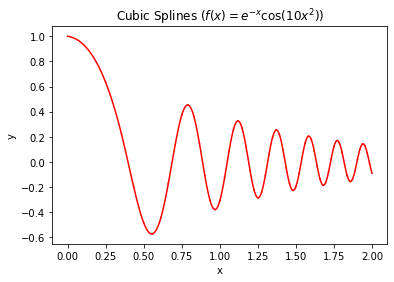

0.20200564775091184


In [3]:
import numpy as np
import matplotlib.pyplot as plt 

np.set_printoptions(suppress=True)

##Matrix in form AB = C  


##define function to calculate the value of y
def fn(x):
    return np.exp(-x) * np.cos(10*x**2) #np.sin(x) 

###INitializations

#Create vector x
x = np.sqrt(np.arange(0, 64.001)/16)#64.001 #np.sqrt(np.arange(0,32.001)/8) ##NOTE SMALL x HERE
#x = np.array([0,1,3])  testing array

## define N as the length of x
N = len(x)

#define n as the number of cubic splines
#There are n splines, each having 3 unknowns:total 3n unknowns
#Therefore, we need 3n equations in order to solve for
n = N-1 ##n = 32

#Create Matrix A
A = np.zeros((4*n, 4*n))*1.0

#Create vector C
C = np.zeros(4*n)*1.0


#
for i in range(n):
    A[i,i] = x[i]**3
    A[i,n+i] = x[i]**2
    A[i,2*n+i] = x[i]
    A[i,3*n+i] = 1
    
    #Rows n to 2n-1
    A[n+i, i] = x[i+1]**3
    A[n+i, n+i] = x[i+1]**2
    A[n+i, 2*n+i] = x[i+1]
    A[n+i, 3*n+i] = 1

    
    C[i] = fn(x[i])
    C[n+i] = fn(x[i+1])


    ###Rows 2n: 3n-1
for j in range(n-1):
    row = 2*n+j
    columns = [j, j+1, n+j, n+j+1, 2*n+j, 2*n+j+1]
    ###start at j+1 since derivatives are equal at the interior points
    values = 3*x[j+1]**2, -3*x[j+1]**2, 2*x[j+1], -2*x[j+1], 1, -1
    A[row, [columns]] = values
   
    ###Function values for Rows C [2n: 3n-1] is zero since we equate derivatives and take everything to the LKS


    ###Rows 3n-1: 4n-2
for q in range(n-1):
    row = 3*n-1 + q
    columns = [q, q+1, n+q, n+q+1]
    ###start at j+1 since derivatives are equal at the interior points
    values = 6*x[q+1], -6*x[q+1], 2, -2
    A[row, [columns]] = values
        ###Function values for Rows C [3n-1:4n-2] is zero since we equate derivatives and take everything to the LKS
    
    

###Use Not-a-Knot spline. 3rd derivative Continuity exists at points x1 and Xn-1
#This yields 6a_0 - 6a_1 = 0 and 6a_n-1 - 6a_n = 0
A[4*n-2, [0,1]] = 6, -6
A[4*n-1, [n-2, n-1]] = 6, -6

    
 #C[4n-2] = 0 and C[4n-1] #ALREADY ZERO # C is vector on RHS


###Solve for vector b
B = np.linalg.solve(A,C)
#B_ = np.dot(np.linalg.inv(A), C)

ai = B[:n]
bi = B[n:2*n]
ci = B[2*n:3*n]
di = B[3*n:]


plt.figure()

for k in range(n):
    xspline = np.linspace(x[k], x[k+1], 100)
    yspline = ai[k]*xspline**3 + bi[k]*xspline**2 + ci[k]*xspline + di[k]
    
    plt.plot(xspline, yspline, 'r-') #

plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Splines ($f(x) = e^{-x}\cos(10x^{2})$)')

plt.show()




##############5b
        
####5b
result = 0

for t in range(n):
    upper_lim = (ai[t]*(x[t+1]**4)/4) + (bi[t]*(x[t+1]**3)/3) + ci[t]*(x[t+1]**2)/2 + di[t]*x[t+1]
    lower_lim = (ai[t]*(x[t]**4)/4) + (bi[t]*(x[t]**3)/3) + ci[t]*(x[t]**2)/2 + di[t]*x[t]
    
    result += ((upper_lim - lower_lim))
    
    
print(result)
        
        
        
    
    
    
    

## PUT THEM ON THE SAME PLOT

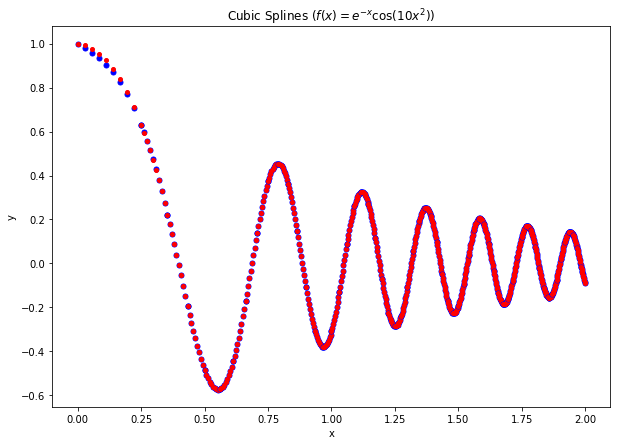

-0.0008328097592311678


In [14]:
import numpy as np
import matplotlib.pyplot as plt 

np.set_printoptions(suppress=True)

##Matrix in form AB = C  


##define function to calculate the value of y
def fn(x):
    return np.exp(-x) * np.cos(10*x**2) #np.sin(x) 

###INitializations

#Create vector x
x = np.sqrt(np.arange(0, 64.001)/16)#64.001 #np.sqrt(np.arange(0,32.001)/8) ##NOTE SMALL x HERE
#x = np.array([0,1,3])  testing array

## define N as the length of x
N = len(x)

#define n as the number of cubic splines
#There are n splines, each having 3 unknowns:total 3n unknowns
#Therefore, we need 3n equations in order to solve for
n = N-1 ##n = 32

#Create Matrix A
A = np.zeros((4*n, 4*n))*1.0

#Create vector C
C = np.zeros(4*n)*1.0


#
for i in range(n):
    A[i,i] = x[i]**3
    A[i,n+i] = x[i]**2
    A[i,2*n+i] = x[i]
    A[i,3*n+i] = 1
    
    #Rows n to 2n-1
    A[n+i, i] = x[i+1]**3
    A[n+i, n+i] = x[i+1]**2
    A[n+i, 2*n+i] = x[i+1]
    A[n+i, 3*n+i] = 1

    
    C[i] = fn(x[i])
    C[n+i] = fn(x[i+1])


    ###Rows 2n: 3n-1
for j in range(n-1):
    row = 2*n+j
    columns = [j, j+1, n+j, n+j+1, 2*n+j, 2*n+j+1]
    ###start at j+1 since derivatives are equal at the interior points
    values = 3*x[j+1]**2, -3*x[j+1]**2, 2*x[j+1], -2*x[j+1], 1, -1
    A[row, [columns]] = values
   
    ###Function values for Rows C [2n: 3n-1] is zero since we equate derivatives and take everything to the LKS


    ###Rows 3n-1: 4n-2
for q in range(n-1):
    row = 3*n-1 + q
    columns = [q, q+1, n+q, n+q+1]
    ###start at j+1 since derivatives are equal at the interior points
    values = 6*x[q+1], -6*x[q+1], 2, -2
    A[row, [columns]] = values
        ###Function values for Rows C [3n-1:4n-2] is zero since we equate derivatives and take everything to the LKS
    

###copy matrix 'A' and store as Z
Z = np.copy(A)    

    

###Use natural spline. Set 2nd derivative at endpoints(x0, xn) to zero to get 2 additional eqns...
A[4*n-2, [0,n]] = 6*x[0], 2
A[4*n-1, [n-1,2*n-1]] = 6*x[n], 2

    
#C[4n-2] = 0 and C[4n-1] #ALREADY ZERO # C is vector on RHS


###Solve for vector b
B = np.linalg.solve(A,C)
#B_ = np.dot(np.linalg.inv(A), C)

ai = B[:n]
bi = B[n:2*n]
ci = B[2*n:3*n]
di = B[3*n:]



############################################################################


###Adjust two last rows of Matriz Z to reflect the Not-a-Knot method
###Use Not-a-Knot spline. 3rd derivative Continuity exists at points x1 and Xn-1
#This yields 6a_0 - 6a_1 = 0 and 6a_n-1 - 6a_n = 0
Z[4*n-2, [0,1]] = 6, -6
Z[4*n-1, [n-2, n-1]] = 6, -6


###Solve for vector b_Z
B_z = np.linalg.solve(Z,C)
#B_ = np.dot(np.linalg.inv(Z), C)

a_z = B_z[:n]
b_z = B_z[n:2*n]
c_z = B_z[2*n:3*n]
d_z = B_z[3*n:]


############################################################################





plt.figure(figsize = (10,7))

for k in range(n):
    xspline = np.linspace(x[k], x[k+1], 10)
    yspline = ai[k]*xspline**3 + bi[k]*xspline**2 + ci[k]*xspline + di[k]
    yspline_Z = a_z[k]*xspline**3 + b_z[k]*xspline**2 + c_z[k]*xspline + d_z[k]
    
    plt.plot(xspline, yspline, 'b.', markersize =10)  ###NATURAL SPLINE METHOD
    plt.plot(xspline, yspline_Z, 'r.', markersize =8)  ###CUBIC SPLINE METHOD

plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Splines ($f(x) = e^{-x}\cos(10x^{2})$)')

plt.show()




##############5b
        
####5b
result = 0

for t in range(n):
    upper_lim = (ai[t]*(x[t+1]**4)/4) + (bi[t]*(x[t+1]**3)/3) + ci[t]*(x[t+1]**2)/2 + di[t]*x[t+1]
    lower_lim = (ai[t]*(x[t]**4)/4) + (bi[t]*(x[t]**3)/3) + ci[t]*(x[t]**2)/2 + di[t]*x[t]
    
    result = ((upper_lim - lower_lim))
    
    
print(result)
        
        
        
    
    
    
    

In [22]:
x[n-1]

1.984313483298443